철강데이터 종속변수 : target  
데이터 출처 : https://www.kaggle.com/uciml/faulty-steel-plates  

1-1) EDA(탐색적 데이터 분석)을 하시오 (시각화와 통계량을 제시할 것)   
1-2) 변수 선택(VIF), 파생변수 생성, 데이터 분할(train/validation/test(20%))
(시각화와 통계량을 제시할 것)  
1-3) 종속변수들 중 "1"인지 아닌지 판단하려 한다. 종속변수를 1과 1이 아닌 값(이항)으로 치환하고 로지스틱 회귀 분석을 실시하라.  
confusionMatrix를 확인하고 최적의 cut off value 정하여라.  
1-4) 종속변수(y)를 다항(7 class)인 상태에서 SVM을 포함하여 3가지 알고리즘으로 평가하라.
각 모델에서 confusionMatrix를 확인하고 최적의 cut off value 를 정하여라.  
1-5) 종속변수를 제외한 나머지 데이터를 바탕으로 군집분석을 실시하고 최적의 군집수와 군집 레이블을 구하여라.
군집레이블을 추가한 데이터를 1-4에서 만든 모델중 가장 성능이 좋았던 하나의 모델에 다시 학습하여 F1-score를 비교하라  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x)
warnings.filterwarnings("ignore")

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/data/adp/week14_기출4/problem1.csv')
df1.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

### 1-1) EDA(탐색적 데이터 분석)을 하시오 (시각화와 통계량을 제시할 것)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1543e180d0>,
      dtype=object)

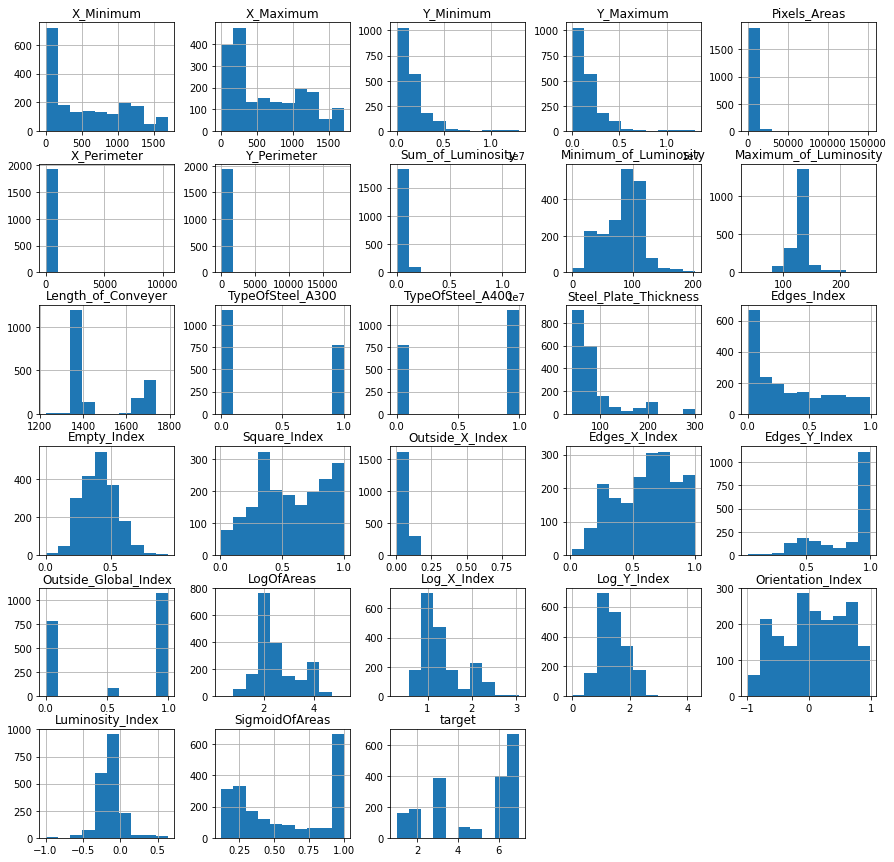

In [ ]:
df1.hist(figsize = (15,15))

In [ ]:
## density plot 확인하기
df1.plot(kind = 'density', layout = (7,4), subplots = True, sharex = False, sharey = False, figsize = (15,15))

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.00000,571.13601,520.69067,0.00000,51.00000,435.00000,1053.00000,1705.00000
X_Maximum,1941.00000,617.96445,497.62741,4.00000,192.00000,467.00000,1072.00000,1713.00000
Y_Minimum,1941.00000,1650684.86811,1774578.41473,6712.00000,471253.00000,1204128.00000,2183073.00000,12987661.00000
Y_Maximum,1941.00000,1650738.70531,1774590.08900,6724.00000,471281.00000,1204136.00000,2183084.00000,12987692.00000
Pixels_Areas,1941.00000,1893.87841,5168.45956,2.00000,84.00000,174.00000,822.00000,152655.00000
X_Perimeter,1941.00000,111.85523,301.20919,2.00000,15.00000,26.00000,84.00000,10449.00000
Y_Perimeter,1941.00000,82.96600,426.48288,1.00000,13.00000,25.00000,83.00000,18152.00000
Sum_of_Luminosity,1941.00000,206312.14786,512293.58761,250.00000,9522.00000,19202.00000,83011.00000,11591414.00000
Minimum_of_Luminosity,1941.00000,84.54869,32.13428,0.00000,63.00000,90.00000,106.00000,203.00000
Maximum_of_Luminosity,1941.00000,130.19371,18.69099,37.00000,124.00000,127.00000,140.00000,253.00000


- 범주형변수: TypeOfSteel_A300, TypeOfSteel_A400, Outside_Global_Index
- 데이터가 치우친 변수: X_Maximum, X_Minimum, Y_Maximum, Y_Minimum, Pixels_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity, Minimum_of_Luminosity, Maximum_of_Luminosity, Length_of_Conveyer, Steel_Plate_Thickness, Edge_Index, Square_Index, Outside_X_Index
- 정규분포에 가까움: Empty_Index, Luminosity_Index

In [ ]:
## y 변수의 범주를 확인
sns.countplot(df1.target)

In [ ]:
df1.corr().style.background_gradient().set_properties(**{'font-size':'10pt'})

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,0.316662,0.144319,-0.144319,0.136625,0.278075,-0.198461,0.063658,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251,0.291760
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,0.299390,0.112009,-0.112009,0.106119,0.242846,-0.152680,0.048575,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736,0.269444
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,-0.049211,0.075164,-0.075164,-0.207640,0.021314,-0.043117,-0.006135,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257,0.000106
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,-0.049219,0.075151,-0.075151,-0.207644,0.021300,-0.043085,-0.006152,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284,0.000093
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,-0.155853,-0.235591,0.235591,-0.183735,-0.275289,0.272808,0.017865,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947,-0.239093
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,-0.134240,-0.189250,0.189250,-0.147712,-0.227590,0.306348,0.004507,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605,-0.190590
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,-0.063825,-0.095154,0.095154,-0.058889,-0.111240,0.188825,-0.047511,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772,-0.096233
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,-0.169331,-0.263632,0.263632,-0.204812,-0.301452,0.293691,0.049607,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248,-0.264962
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,-0.023579,0.042048,-0.042048,0.103393,0.358915,-0.044111,0.066748,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797,0.289873
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,-0.098009,-0.216339,0.216339,-0.128397,0.149675,0.031425,0.065517,0.099300,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651,0.018774


서로 상관성이 높은 변수  
- SigmoidOfAreas, LogOfAreas,Log_X_Index, Log_Y_Index 
- Orientation_IIndex, Outside_Global_Index, Edge_Y_Index
- Luminosity_Index, Maximum/Minimum of Luminosity
- Pixels_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity
- X_Maximum, X_Minimum
- Y_Maximum, Y_Minimum

- NA값이 들어간 데이터는 없음
- 데이터 불균형이 확인됨. 2번에서 요구하는 것처럼 hold out 방법으로 데이터를 적합시키려면 oversampling을 해야 할 것 같음. 
- 변수의 개수가 많고 서로 개념적/수치적으로 상관성이 높은 변수들이 있어 변수선택이 필요함.
- X 변수끼리 scale의 차이가 있어서 표준화 필요성이 있음

### 1-2) 변수 선택(VIF), 파생변수 생성, 데이터 분할(train/validation/test(20%)) (시각화와 통계량을 제시할 것)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df1_vif = pd.DataFrame()
df1_vif['VIF_Factor'] = [variance_inflation_factor(df1.iloc[:,:-1].values, i) for i in range(df1.iloc[:,:-1].shape[1])]
df1_vif['Feature'] = df1.iloc[:,:-1].columns
df1_vif.sort_values(by = 'VIF_Factor', ascending = True)

,VIF_Factor,Feature
13,1.26658,Steel_Plate_Thickness
14,1.32192,Edges_Index
16,1.83838,Square_Index
10,1.93146,Length_of_Conveyer
18,5.70824,Edges_X_Index
20,5.83132,Outside_Global_Index
9,6.03640,Maximum_of_Luminosity
8,8.32432,Minimum_of_Luminosity
19,9.43862,Edges_Y_Index
26,9.61115,SigmoidOfAreas


보통 vif 값이 15를 넘으면 변수 간에 다중공선성이 있다고 판단한다. 가장 큰 값부터 변수를 어떻게 변경할지 생각해본다면, 
- X/Y_Maximum/Minimum 값 : Minimum과 Maximum 값을 더하고 평균낸 값으로 대체한다
- Y_Perimeter: Pixel_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity는 서로 상관성이 높기 떄문에, 어떤 데이터인지는 확실치 않으나 네 변수의 Scale을 맞춰주고 평균값으로 대체한다.
- Log_Areas: Log_X_Index, Log_Y_Index 와 상관성이 높기 때문에 변수에서 제외한다. 또한 두 값을 더한 평균을 새로운 변수로 넣는다.
-  